<a href="https://colab.research.google.com/github/aishamohamed/GAN-Benchmarck/blob/main/Preprocessing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import os
import re
import shutil
import cv2
import numpy as np


# Mount Google Drive and Set Up Directory Structure

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive

# Set the base directory
base_dir = '/content/drive/MyDrive/ISIC2017'

# Define directory paths for each stage of the pipeline
image_folder = os.path.join(base_dir, 'images')               # Contains original JPEG images
mask_folder = os.path.join(base_dir, 'masks')                   # Contains segmentation masks (PNG files)
cropped_folder = os.path.join(base_dir, 'cropped')              # Will store cropped lesion images
resized_folder = os.path.join(base_dir, 'resized')   # Will store resized and normalized images
superpixels_folder = os.path.join(base_dir, 'superpixels')      # Will store extraneous PNG files (superpixels)

print("Directory structure set up:")
print("Images:", image_folder)
print("Masks:", mask_folder)
print("Cropped:", cropped_folder)
print("Resized/Normalized:", resized_folder)
print("Augmented:", augmented_folder)
print("Superpixels:", superpixels_folder)



Directory structure set up:
Images: /content/drive/MyDrive/ISIC2017/images
Masks: /content/drive/MyDrive/ISIC2017/masks
Cropped: /content/drive/MyDrive/ISIC2017/cropped
Resized/Normalized: /content/drive/MyDrive/ISIC2017/resized
Augmented: /content/drive/MyDrive/ISIC2017/augmented
Superpixels: /content/drive/MyDrive/ISIC2017/superpixels


#Varify File Names


In [ ]:
def verify_file_names(image_folder, mask_folder):
    """
    Verify that every image file in image_folder has a corresponding mask in mask_folder.

    Parameters:
      image_folder (str): Path to the folder containing the JPEG images.
      mask_folder (str): Path to the folder containing the PNG segmentation masks.

    Returns:
      missing_masks (set): Set of image base names that do not have a matching mask.
    """
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
    image_basenames = {os.path.splitext(f)[0] for f in image_files}

    mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith('.png')]
    mask_basenames = set()
    for f in mask_files:
        base = os.path.splitext(f)[0]
        base_clean = re.sub(r'_segmentation$', '', base)
        mask_basenames.add(base_clean)

    missing_masks = image_basenames - mask_basenames
    if missing_masks:
        print("The following images do not have matching masks:")
        for name in sorted(missing_masks):
            print(name)
    else:
        print("All images have matching masks!")
    return missing_masks


In [ ]:
print("Verifying file names and mask matching...")
verify_file_names(image_folder, mask_folder)


Verifying file names and mask matching...
All images have matching masks!


set()

#Standardize Mask Names

In [ ]:
def standardize_mask_names(mask_folder):
    """
    Standardize the naming of mask files in mask_folder to the pattern 'ISIC_XXXXXXX_segmentation.png'.

    Parameters:
      mask_folder (str): Path to the folder containing mask files.
    """
    mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith('.png')]
    for f in mask_files:
        old_base, ext = os.path.splitext(f)
        if not re.match(r'ISIC_\d+', old_base):
            if old_base.startswith("ISIC") and len(old_base) > 4:
                new_base = "ISIC_" + old_base[4:]
                new_filename = new_base + ext
                old_path = os.path.join(mask_folder, f)
                new_path = os.path.join(mask_folder, new_filename)
                os.rename(old_path, new_path)
                print(f"Renamed {f} to {new_filename}")

In [ ]:
    print("Standardizing mask filenames...")
    standardize_mask_names(mask_folder)


Standardizing mask filenames...


#Move Superpixel Files

In [ ]:
def move_superpixel_files(source_folder, destination_folder):
    """
    Move all PNG files from source_folder (which are assumed to be superpixel files) to destination_folder.

    Parameters:
      source_folder (str): Folder containing mixed files (JPEGs and PNGs).
      destination_folder (str): Folder to store the PNG superpixel files.
    """
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        if filename.lower().endswith('.png'):
            source_path = os.path.join(source_folder, filename)
            destination_path = os.path.join(destination_folder, filename)
            shutil.move(source_path, destination_path)
            print(f"Moved {filename} to {destination_folder}")


In [ ]:
print("Moving superpixel files to separate folder...")
move_superpixel_files(image_folder, superpixels_folder)

Moving superpixel files to separate folder...
Moved ISIC_0013474_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013486_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013487_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013494_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013492_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013489_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013488_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013493_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013490_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013499_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013516_superpixels.png to /content/drive/MyDrive/ISIC2017/superpixels
Moved ISIC_0013495_superpixels.png to /content/drive

In [ ]:
# List a few files from each directory to verify
print("Images folder:", os.listdir(image_folder)[:5])
print("Masks folder:", os.listdir(mask_folder)[:5])
print("Superpixels folder:", os.listdir(superpixels_folder)[:5])

Images folder: ['ISIC_0013458.jpg', 'ISIC_0013456.jpg', 'ISIC_0013461.jpg', 'ISIC_0013480.jpg', 'ISIC_0013489.jpg']
Masks folder: ['ISIC_0011223_segmentation.png', 'ISIC_0011218_segmentation.png', 'ISIC_0011303_segmentation.png', 'ISIC_0011306_segmentation.png', 'ISIC_0011294_segmentation.png']
Superpixels folder: ['ISIC_0013474_superpixels.png', 'ISIC_0013486_superpixels.png', 'ISIC_0013487_superpixels.png', 'ISIC_0013494_superpixels.png', 'ISIC_0013492_superpixels.png']


#Crop Lesions

In [ ]:
def crop_lesions(image_folder, mask_folder, output_folder, margin=10):
    """
    Crop lesion regions from each image using its corresponding segmentation mask.

    Parameters:
      image_folder (str): Folder containing the original JPEG images.
      mask_folder (str): Folder containing segmentation masks.
      output_folder (str): Destination folder for saving the cropped images.
      margin (int): Margin in pixels to add around the lesion area.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(image_folder):
        if filename.lower().endswith('.jpg'):
            image_path = os.path.join(image_folder, filename)
            base_name = os.path.splitext(filename)[0]

            mask_filename = base_name + '_segmentation.png'
            mask_path = os.path.join(mask_folder, mask_filename)

            if not os.path.exists(mask_path):
                print(f"Mask for {filename} not found. Skipping...")
                continue

            image = cv2.imread(image_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if image is None or mask is None:
                print(f"Error reading {filename} or its mask. Skipping...")
                continue

            ret, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
            coords = cv2.findNonZero(binary_mask)
            if coords is None:
                print(f"No lesion detected in mask for {filename}. Skipping cropping.")
                continue

            x, y, w, h = cv2.boundingRect(coords)
            x = max(x - margin, 0)
            y = max(y - margin, 0)
            w = min(w + 2 * margin, image.shape[1] - x)
            h = min(h + 2 * margin, image.shape[0] - y)

            cropped_image = image[y:y+h, x:x+w]
            cv2.imwrite(os.path.join(output_folder, filename), cropped_image)
            print(f"Cropped image saved: {filename}")




In [ ]:
print("Cropping lesions using segmentation masks...")
crop_lesions(image_folder, mask_folder, cropped_folder)

Cropping lesions using segmentation masks...
Cropped image saved: ISIC_0011223.jpg
Cropped image saved: ISIC_0011227.jpg
Cropped image saved: ISIC_0011220.jpg
Cropped image saved: ISIC_0011217.jpg
Cropped image saved: ISIC_0011294.jpg
Cropped image saved: ISIC_0011298.jpg
Cropped image saved: ISIC_0011300.jpg
Cropped image saved: ISIC_0011304.jpg
Cropped image saved: ISIC_0011306.jpg
Cropped image saved: ISIC_0011310.jpg
Cropped image saved: ISIC_0011305.jpg
Cropped image saved: ISIC_0011297.jpg
Cropped image saved: ISIC_0011303.jpg
Cropped image saved: ISIC_0011296.jpg
Cropped image saved: ISIC_0011321.jpg
Cropped image saved: ISIC_0011336.jpg
Cropped image saved: ISIC_0011315.jpg
Cropped image saved: ISIC_0011327.jpg
Cropped image saved: ISIC_0011338.jpg
Cropped image saved: ISIC_0011330.jpg
Cropped image saved: ISIC_0011328.jpg
Cropped image saved: ISIC_0011317.jpg
Cropped image saved: ISIC_0011339.jpg
Cropped image saved: ISIC_0011324.jpg
Cropped image saved: ISIC_0011333.jpg
Cropp

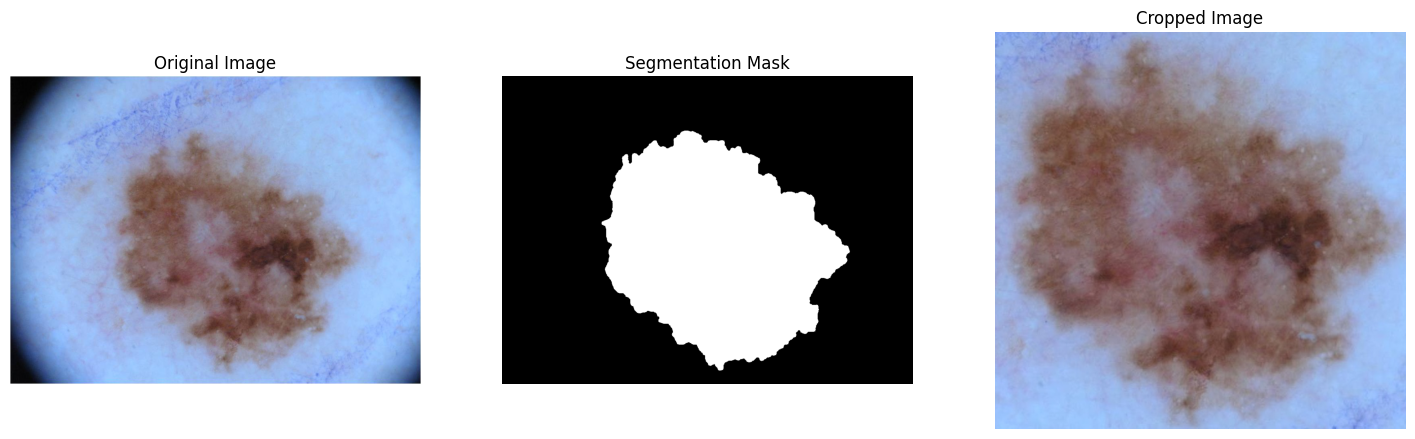

In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_cropping_results(image_path, mask_path, cropped_path):
    # Read the images and mask
    original = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    cropped = cv2.imread(cropped_path)

    # Convert from BGR to RGB for display (OpenCV uses BGR by default)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

    # Display images side by side
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title("Segmentation Mask")
    axes[1].axis("off")

    axes[2].imshow(cropped)
    axes[2].set_title("Cropped Image")
    axes[2].axis("off")

    plt.show()


plot_cropping_results(
    image_path=os.path.join(image_folder, 'ISIC_0000002.jpg'),
    mask_path=os.path.join(mask_folder, 'ISIC_0000002_segmentation.png'),
    cropped_path=os.path.join(cropped_folder, 'ISIC_0000002.jpg')
)


#Resize Images

In [ ]:
def resize_images(input_folder, output_folder, target_size=(128,128)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if not filename.lower().endswith(".jpg"): continue
        img = cv2.imread(os.path.join(input_folder, filename))
        if img is None: continue
        resized = cv2.resize(img, target_size)
        cv2.imwrite(os.path.join(output_folder, filename), resized)

In [ ]:
print("Resizing images to 128x128...")
resize_images(cropped_folder, resized_folder)


Resizing images to 128x128...


In [ ]:
import os
import shutil
import pandas as pd

BASE_DIR      = "/content/drive/MyDrive/ISIC2017"
RESIZED_DIR   = os.path.join(BASE_DIR, "resized")
LABELS_CSV    = os.path.join(BASE_DIR, "labels.csv")
DEST_ROOT     = os.path.join(BASE_DIR, "by_class_128")

for cls in ("melanoma","seborrheic_keratosis","nevus"):
    os.makedirs(os.path.join(DEST_ROOT, cls), exist_ok=True)

# Read CSV
df = pd.read_csv(LABELS_CSV)

# Loop over every row, decide its class, and copy
missing = []
for _, row in df.iterrows():
    img_id = str(row["image_id"])
    src_fp = os.path.join(RESIZED_DIR, img_id + ".jpg")
    if not os.path.exists(src_fp):
        missing.append(img_id)
        continue

    # pick class
    if row["melanoma"] == 1:
        cls = "melanoma"
    elif row["seborrheic_keratosis"] == 1:
        cls = "seborrheic_keratosis"
    else:
        cls = "nevus"

    dst_fp = os.path.join(DEST_ROOT, cls, img_id + ".jpg")
    shutil.copy(src_fp, dst_fp)

print(f" Classes Copied into {DEST_ROOT}")
if missing:
    print(f" {len(missing)} files were in the CSV but not found on disk: {missing[:5]}…")


 Classes Copied into /content/drive/MyDrive/ISIC2017/by_class_128
